# Mínimos Quadrados

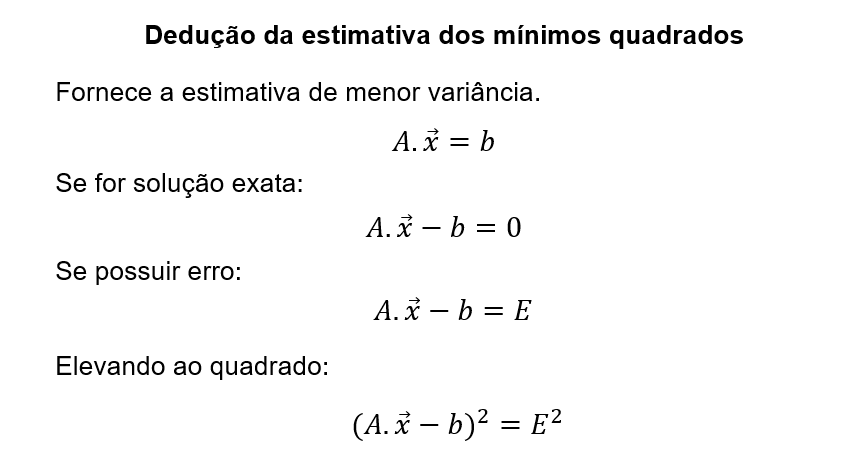

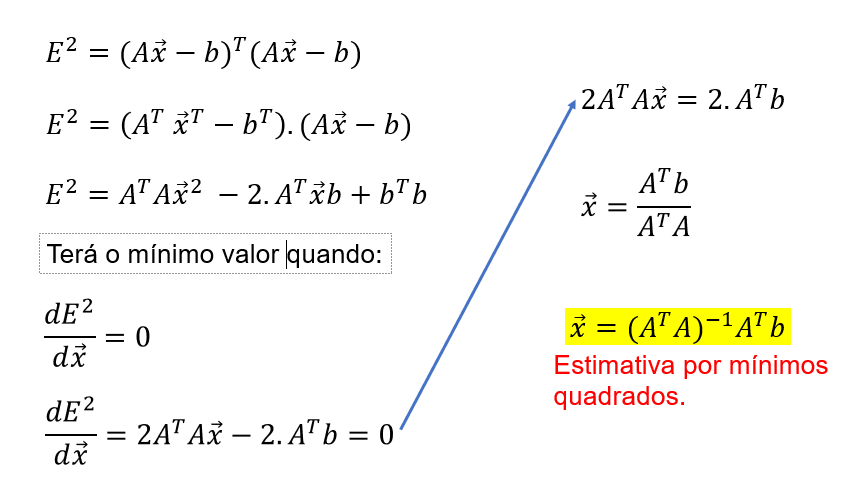

## Análise Inicial

In [81]:
import pandas as pd
import numpy as np
import scipy as sp

In [82]:
#Importando o excel
df = pd.read_excel('/content/concurso.xlsx')

In [83]:
#5 Primeiros registros
df.head()

,inicio_estudo,tempo_estudo_dia,nota
0,5,120,8.1
1,13,90,6.8
2,20,120,7.0
3,28,60,7.4
4,20,150,9.3


In [84]:
#Forma do Dataframe (linhas, colunas)
df.shape

(25, 3)

In [85]:
#Tipos de dados das colunas
df.dtypes

inicio_estudo         int64
tempo_estudo_dia      int64
nota                float64
dtype: object

In [86]:
#Há dados nulos ?
df.isnull().sum()

inicio_estudo       0
tempo_estudo_dia    0
nota                0
dtype: int64

In [87]:
df.isna().sum()

inicio_estudo       0
tempo_estudo_dia    0
nota                0
dtype: int64

## Criação de Matriz dos Coeficientes

In [88]:
df.head()

,inicio_estudo,tempo_estudo_dia,nota
0,5,120,8.1
1,13,90,6.8
2,20,120,7.0
3,28,60,7.4
4,20,150,9.3


In [89]:
A = df.drop(columns=['nota'])
A.head()

,inicio_estudo,tempo_estudo_dia
0,5,120
1,13,90
2,20,120
3,28,60
4,20,150


In [90]:
type(A)

pandas.core.frame.DataFrame

In [91]:
#Transformando DF em Matriz numpy
A = A.values
print(A)

[[  5 120]
 [ 13  90]
 [ 20 120]
 [ 28  60]
 [ 20 150]
 [ 24 150]
 [ 18  60]
 [  8 120]
 [  2 240]
 [ 12  90]
 [ 15  90]
 [  9 120]
 [  6 180]
 [  4  90]
 [  8 150]
 [ 12 120]
 [ 10 180]
 [  3  90]
 [ 15 180]
 [  9  90]
 [ 24 120]
 [  5 150]
 [  7 120]
 [ 12 180]
 [  2  90]]


## Criação de Matriz das Constantes

In [92]:
df.head()

,inicio_estudo,tempo_estudo_dia,nota
0,5,120,8.1
1,13,90,6.8
2,20,120,7.0
3,28,60,7.4
4,20,150,9.3


In [93]:
b = df.drop(columns=['inicio_estudo','tempo_estudo_dia'])
b.head()

,nota
0,8.1
1,6.8
2,7.0
3,7.4
4,9.3


In [94]:
#Transformando b em Matriz
b = b.values
print(b)

[[8.1]
 [6.8]
 [7. ]
 [7.4]
 [9.3]
 [7.5]
 [7.6]
 [8. ]
 [7. ]
 [7.3]
 [8.6]
 [8.3]
 [7.9]
 [6.4]
 [7.8]
 [9.4]
 [8.8]
 [6.9]
 [7.7]
 [8.2]
 [8.6]
 [8.1]
 [7.2]
 [8.5]
 [6.1]]


## Estimativa por Mínimos Quadrados

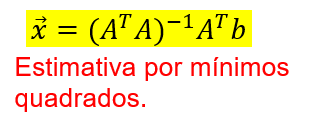

In [95]:
# At = Matriz Transposta de A

At = np.array(A).T
print(At)

[[  5  13  20  28  20  24  18   8   2  12  15   9   6   4   8  12  10   3
   15   9  24   5   7  12   2]
 [120  90 120  60 150 150  60 120 240  90  90 120 180  90 150 120 180  90
  180  90 120 150 120 180  90]]


In [96]:
AtA = np.dot(At,A)
print(AtA)

[[  4669  34950]
 [ 34950 441900]]


In [97]:
AtAinv = np.linalg.inv(AtA)
print(AtAinv)

[[ 5.24991072e-04 -4.15216971e-05]
 [-4.15216971e-05  5.54691857e-06]]


In [98]:
Atb = np.dot(At,b)
print(Atb)

[[ 2305.9]
 [24726. ]]


In [99]:
vetor = np.dot(AtAinv,Atb)
print(vetor)

[[0.18391143]
 [0.04140823]]


In [100]:
def minimo_quadrado (A, At, b):
  vetor = np.dot(np.dot(np.linalg.inv(np.dot(At,A)),At),b)
  return vetor

In [101]:
vetor = minimo_quadrado(A, At, b)
vetor

array([[0.18391143],
       [0.04140823]])

Onde <br>
vetor[0] = x <br>
vetor[1] = y <br>

In [102]:
resultado = df
resultado.head()

,inicio_estudo,tempo_estudo_dia,nota
0,5,120,8.1
1,13,90,6.8
2,20,120,7.0
3,28,60,7.4
4,20,150,9.3


In [103]:
resultado['previsao_minimo_quadrado'] = resultado['inicio_estudo']*vetor[0]+resultado['tempo_estudo_dia']*vetor[1]
resultado.head()

,inicio_estudo,tempo_estudo_dia,nota,previsao_minimo_quadrado
0,5,120,8.1,5.888544
1,13,90,6.8,6.117589
2,20,120,7.0,8.647216
3,28,60,7.4,7.634014
4,20,150,9.3,9.889463


In [104]:
# Erro médio absoluto (MAE)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(resultado.nota, resultado.previsao_minimo_quadrado)

1.5823602999826787

In [105]:
resultado['erro_abs_minimo_quadrado'] = abs (resultado.nota - resultado.previsao_minimo_quadrado)
resultado.head()

,inicio_estudo,tempo_estudo_dia,nota,previsao_minimo_quadrado,erro_abs_minimo_quadrado
0,5,120,8.1,5.888544,2.211456
1,13,90,6.8,6.117589,0.682411
2,20,120,7.0,8.647216,1.647216
3,28,60,7.4,7.634014,0.234014
4,20,150,9.3,9.889463,0.589463


## Estimativa com Modelo de Regressão Linear Múltipla

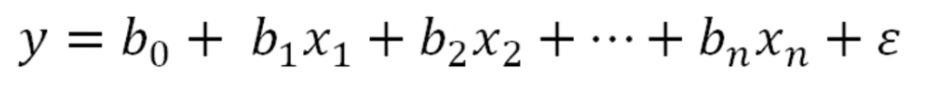

Caso os coeficientes seja 0, o modelo de Mínimos Quadrados não consegue estimar perfeitamente.

Então usa-se a Regressão Linear Múltipla, pois o Coeficiente 0, é chamado de 'Interceptor' e a função dele é melhorar a estimativa caso os coeficientes sejam zero.

In [106]:
resultado.dtypes

inicio_estudo                 int64
tempo_estudo_dia              int64
nota                        float64
previsao_minimo_quadrado    float64
erro_abs_minimo_quadrado    float64
dtype: object

In [107]:
B = resultado.drop(columns=['nota','previsao_minimo_quadrado','erro_abs_minimo_quadrado'])
B.head()

,inicio_estudo,tempo_estudo_dia
0,5,120
1,13,90
2,20,120
3,28,60
4,20,150


In [108]:
# Criando um Constante Peso com valor 1
B = B.assign(unidade=1)
B

,inicio_estudo,tempo_estudo_dia,unidade
0,5,120,1
1,13,90,1
2,20,120,1
3,28,60,1
4,20,150,1
5,24,150,1
6,18,60,1
7,8,120,1
8,2,240,1
9,12,90,1


In [109]:
B = B[['unidade','inicio_estudo','tempo_estudo_dia']]
B.head()

,unidade,inicio_estudo,tempo_estudo_dia
0,1,5,120
1,1,13,90
2,1,20,120
3,1,28,60
4,1,20,150


In [110]:
B = B.values
print(B)

[[  1   5 120]
 [  1  13  90]
 [  1  20 120]
 [  1  28  60]
 [  1  20 150]
 [  1  24 150]
 [  1  18  60]
 [  1   8 120]
 [  1   2 240]
 [  1  12  90]
 [  1  15  90]
 [  1   9 120]
 [  1   6 180]
 [  1   4  90]
 [  1   8 150]
 [  1  12 120]
 [  1  10 180]
 [  1   3  90]
 [  1  15 180]
 [  1   9  90]
 [  1  24 120]
 [  1   5 150]
 [  1   7 120]
 [  1  12 180]
 [  1   2  90]]


In [111]:
Bt = np.array(B).T
print(Bt)

[[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
    1   1   1   1   1   1   1]
 [  5  13  20  28  20  24  18   8   2  12  15   9   6   4   8  12  10   3
   15   9  24   5   7  12   2]
 [120  90 120  60 150 150  60 120 240  90  90 120 180  90 150 120 180  90
  180  90 120 150 120 180  90]]


In [112]:
vetor_regressao_linear = minimo_quadrado(B, Bt, b)
vetor_regressao_linear

array([[6.48712882e+00],
       [4.13304622e-02],
       [6.44273496e-03]])

Onde,

vetor[0] = Intercept <br>
vetor[1] = X <br>
vetor[2] = Y <br>

In [113]:
resultado['previsao_regressao_linear_multipla'] = vetor_regressao_linear[0]+resultado['inicio_estudo']*vetor_regressao_linear[1]+resultado['tempo_estudo_dia']*vetor_regressao_linear[2]
resultado.head()

,inicio_estudo,tempo_estudo_dia,nota,previsao_minimo_quadrado,erro_abs_minimo_quadrado,previsao_regressao_linear_multipla
0,5,120,8.1,5.888544,2.211456,7.466909
1,13,90,6.8,6.117589,0.682411,7.604271
2,20,120,7.0,8.647216,1.647216,8.086866
3,28,60,7.4,7.634014,0.234014,8.030946
4,20,150,9.3,9.889463,0.589463,8.280148


In [114]:
# Erro Médio Absoluto (MAE)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(resultado.nota, resultado.previsao_regressao_linear_multipla)

0.6362742744691541

In [115]:
resultado['erro_abs_regressao_linear_multipla'] = abs (resultado.nota - resultado.previsao_regressao_linear_multipla)
resultado

,inicio_estudo,tempo_estudo_dia,nota,previsao_minimo_quadrado,erro_abs_minimo_quadrado,previsao_regressao_linear_multipla,erro_abs_regressao_linear_multipla
0,5,120,8.1,5.888544,2.211456,7.466909,0.633091
1,13,90,6.8,6.117589,0.682411,7.604271,0.804271
2,20,120,7.0,8.647216,1.647216,8.086866,1.086866
3,28,60,7.4,7.634014,0.234014,8.030946,0.630946
4,20,150,9.3,9.889463,0.589463,8.280148,1.019852
5,24,150,7.5,10.625108,3.125108,8.445470,0.945470
6,18,60,7.6,5.794899,1.805101,7.617641,0.017641
7,8,120,8.0,6.440279,1.559721,7.590901,0.409099
8,2,240,7.0,10.305797,3.305797,8.116046,1.116046
9,12,90,7.3,5.933678,1.366322,7.562941,0.262941


## Biblioteca Statmodels


In [116]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [117]:
# Criação do modelo Usando a biblioteca Statmodels
modelo = smf.ols('nota ~ inicio_estudo + tempo_estudo_dia', data=df).fit()

In [118]:
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                   nota   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     2.485
Date:                Mon, 13 Sep 2021   Prob (F-statistic):              0.106
Time:                        17:08:11   Log-Likelihood:                -28.151
No. Observations:                  25   AIC:                             62.30
Df Residuals:                      22   BIC:                             65.96
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            6.4871      0.624  